# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset 

In [2]:
df = pd.read_csv("Customer Booking Data.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.shape

(50000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

## Data Cleaning

### Finding Duplicates Value

In [5]:
duplicates = df[df.duplicated()]
duplicates

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [6]:
df1 = df.drop_duplicates()

In [7]:
df1.shape

(49281, 14)

### describing all the tables

In [8]:
df1.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Sales Channel

In [9]:
per_internet = df1["sales_channel"].value_counts().values[0]  / df1["sales_channel"].count() *100
per_mobile = df1["sales_channel"].value_counts().values[1]  / df1["sales_channel"].count() *100

In [10]:
print(f"Number of bookings done through internet: {per_internet:.2f}%")
print(f"Number of bookings done through phone call: {per_mobile:.2f}%")

Number of bookings done through internet: 89.12%
Number of bookings done through phone call: 10.88%


### Trip Type

In [11]:
per_round = df1["trip_type"].value_counts().values[0]/ df1["trip_type"].count() *100
per_oneway = df1["trip_type"].value_counts().values[1]/ df1["trip_type"].count() *100
per_circle = df1["trip_type"].value_counts().values[2]/ df1["trip_type"].count() *100

In [12]:
print(f"Percentage of round trips: {per_round:.2f} %")
print(f"Percentage of One way trips: {per_oneway:.2f} %")
print(f"Percentage of circle trips: {per_circle:.2f} %")

Percentage of round trips: 98.98 %
Percentage of One way trips: 0.78 %
Percentage of circle trips: 0.24 %


### purchase lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

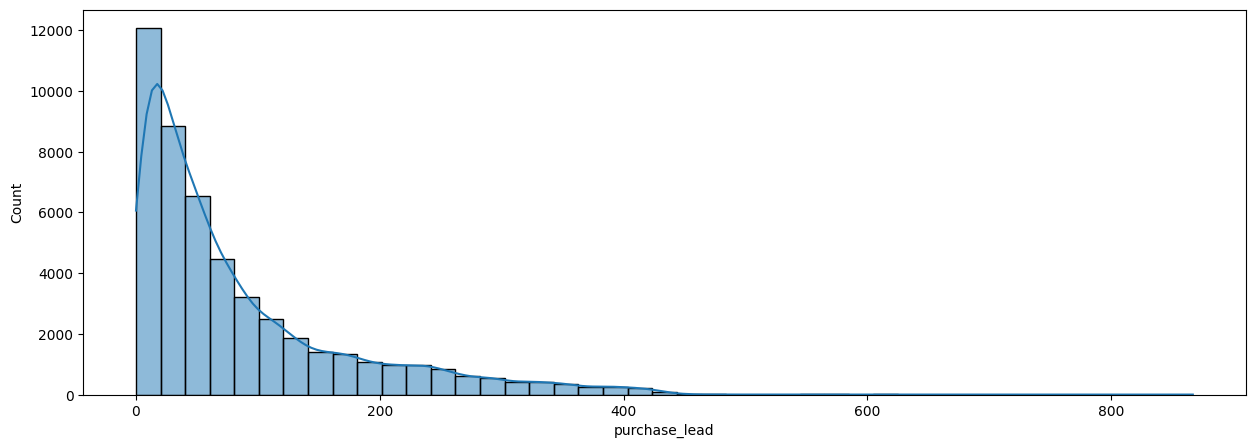

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(data=df1, x="purchase_lead", binwidth=20,kde=True)

There are few bookings that were done more than 2 years before the travel date and it seems very unlikely that book that in advance. However, it might also be because of the cancellation and rebooking in a period of 6 months for twice. Generally airline keep the tickets for rebooking within a year. But at this point we will consider them as outliers which will effect the results of predictive model in a huge way.

In [14]:
(df1["purchase_lead"] >500).value_counts()

purchase_lead
False    49263
True        18
Name: count, dtype: int64

If we assume that no customer is booking in advance of more than 1 and half year we will remove all entries with purchase_lead more than 600 days.

In [15]:
df2 = df1[df1["purchase_lead"] <500 ]

In [16]:
df2.shape

(49263, 14)

### Length Of Stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

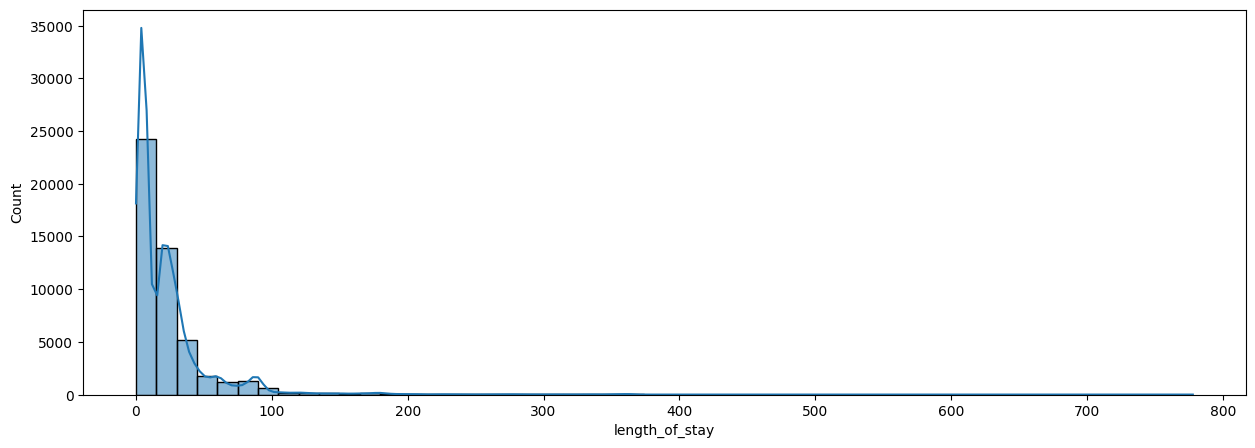

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(data=df2, x="length_of_stay", binwidth=15,kde=True)

Let's see how many entries do we have that exceeds length of stay more than 100 days.

In [18]:
df2.shape

(49263, 14)

In [19]:
(df2["length_of_stay"]> 200).value_counts()

length_of_stay
False    48990
True       273
Name: count, dtype: int64

In [20]:
df2[df2["length_of_stay"]> 500].booking_complete.value_counts()

booking_complete
0    9
1    1
Name: count, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

### Flight Days

In [21]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}
df2["flight_day"] = df2["flight_day"].map(mapping)

C:\Users\shreyash\AppData\Local\Temp\ipykernel_2644\2313235781.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["flight_day"] = df2["flight_day"].map(mapping)


In [22]:
df2["flight_day"].value_counts()

flight_day
1    7986
3    7559
2    7555
4    7322
5    6683
7    6438
6    5720
Name: count, dtype: int64

Most of the customers want to travel on Monday and choose Saturday as least preffered day as flight day.

### Booking Origin

Text(0, 0.5, 'Number of bookings')

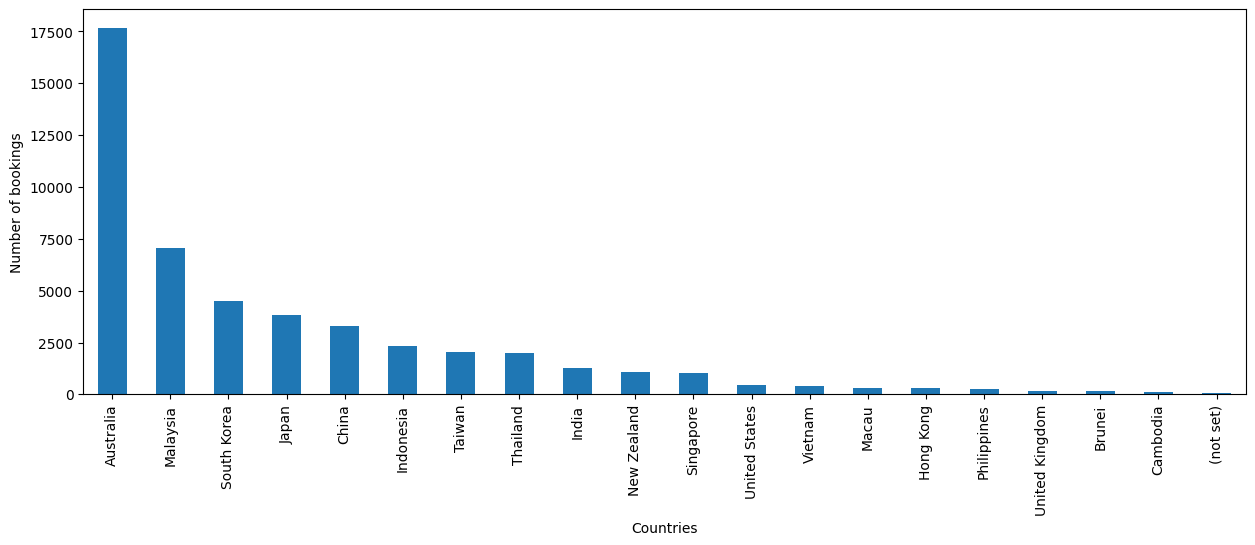

In [23]:
plt.figure(figsize=(15,5))
ax = df2["booking_origin"].value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Above chart shows travellers from which country had maximum booking applications.

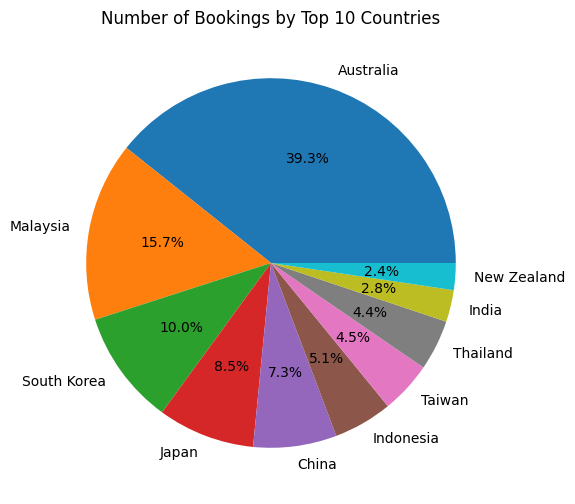

In [24]:
top_countries = df2["booking_origin"].value_counts()[:10]
booking_counts = top_countries.values
country_names = top_countries.index
plt.figure(figsize=(6, 6))
plt.pie(booking_counts, labels=country_names, autopct='%1.1f%%')
plt.title("Number of Bookings by Top 10 Countries")
plt.show()

Among the top 10 countries by booking count, Australia has the highest share with 39.3%, followed by Malaysia (15.7%), and South Korea (10%). Japan and China also represent significant portions with 8.5% and 7.3% respectively, while the remaining countries contribute smaller percentages to the total bookings.

Text(0, 0.5, 'Number of complete bookings')

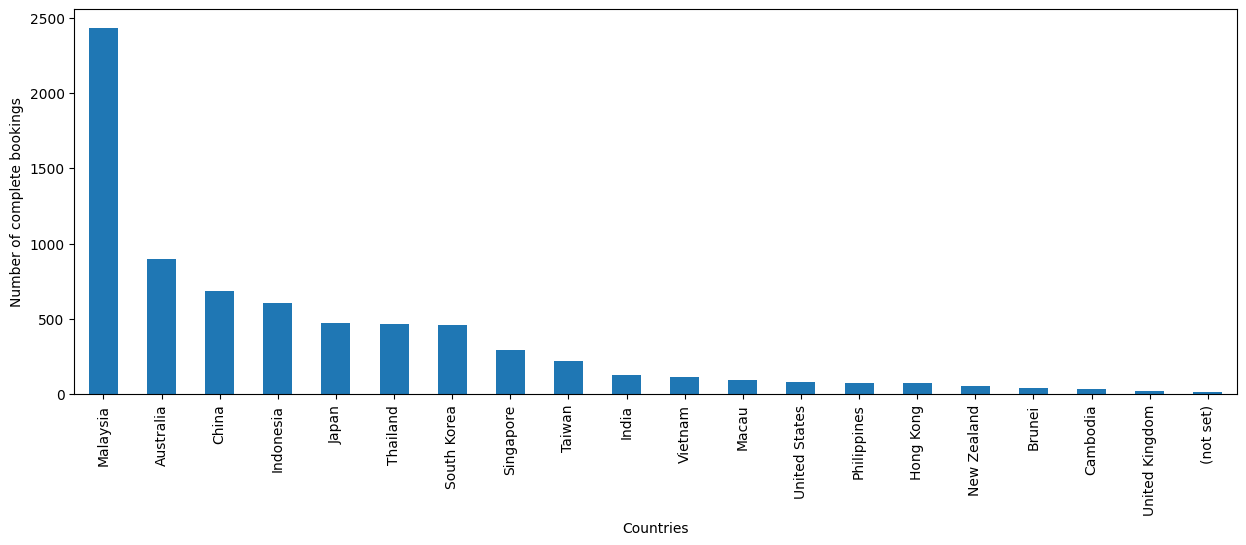

In [25]:
plt.figure(figsize=(15,5))
ax = df2[df2["booking_complete"] ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Above chart shows travellers from which country had their booking complete.

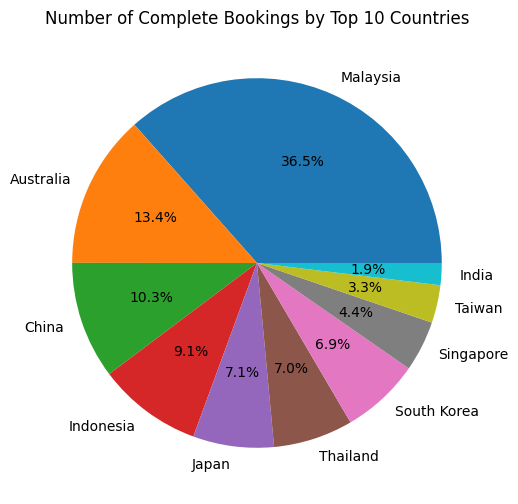

In [26]:
top_countries_filtered = df2[df2["booking_complete"] == 1]["booking_origin"].value_counts()[:10]
booking_counts = top_countries_filtered.values
country_names = top_countries_filtered.index
plt.figure(figsize=(6, 6))
plt.pie(booking_counts, labels=country_names, autopct='%1.1f%%')
plt.title("Number of Complete Bookings by Top 10 Countries")
plt.show()

The data indicates that among the top 10 countries with complete bookings, Malaysia has the highest share at 36.5%, followed by Australia (13.4%) and China (10.3%). The remaining countries contribute varying percentages to the total number of complete bookings.

### Booking complete

In [27]:
unsuccessful_booking_per = df2["booking_complete"].value_counts().values[0] / len(df2) * 100

In [28]:
successful_booking_per = 100-unsuccessful_booking_per

Out of 49263 booking entries only 15.0 % bookings


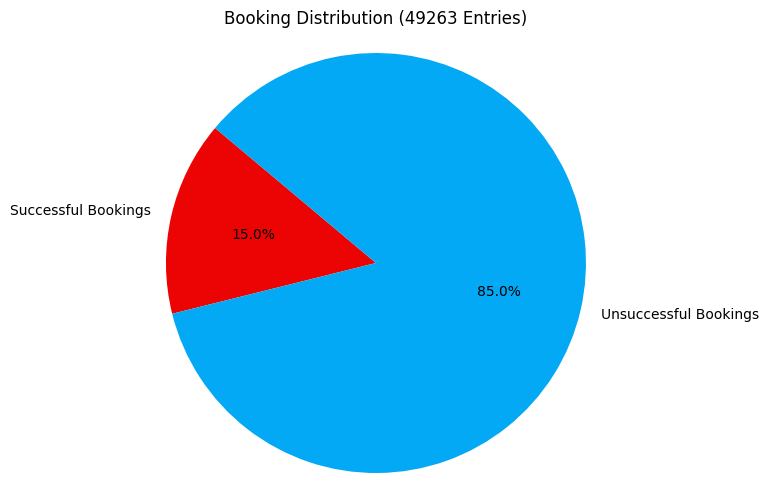

In [29]:
print(f"Out of {len(df2)} booking entries only {round(successful_booking_per,2)} % bookings")
total_bookings = len(df2)
labels = ['Successful Bookings', 'Unsuccessful Bookings']
sizes = [successful_booking_per, unsuccessful_booking_per]
colors = ['#ec0404', '#03a9f4']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'Booking Distribution ({total_bookings} Entries)')
plt.axis('equal')
plt.show()

In [30]:
df3 = df2.reset_index(drop=True)

### We will one hot encode the categorical columns.

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df3[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df3 = df3.join(encoder_df)
encoder_df = pd.DataFrame(encoder.fit_transform(df3[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df3 = df3.join(encoder_df)

In [32]:
df3['RoundTRip'] = df3['RoundTRip'].astype(int)
df3['OneWayTrip'] = df3['OneWayTrip'].astype(int)
df3['CircleTrip'] = df3['CircleTrip'].astype(int)

In [33]:
df3.drop(['sales_channel', 'trip_type','booking_origin','route'], axis=1, inplace = True)

In [34]:
label = df3['booking_complete']

In [35]:
df3 = df3.drop('booking_complete', axis=1)

In [36]:
df3['label']  = label

### Correlation Matrix

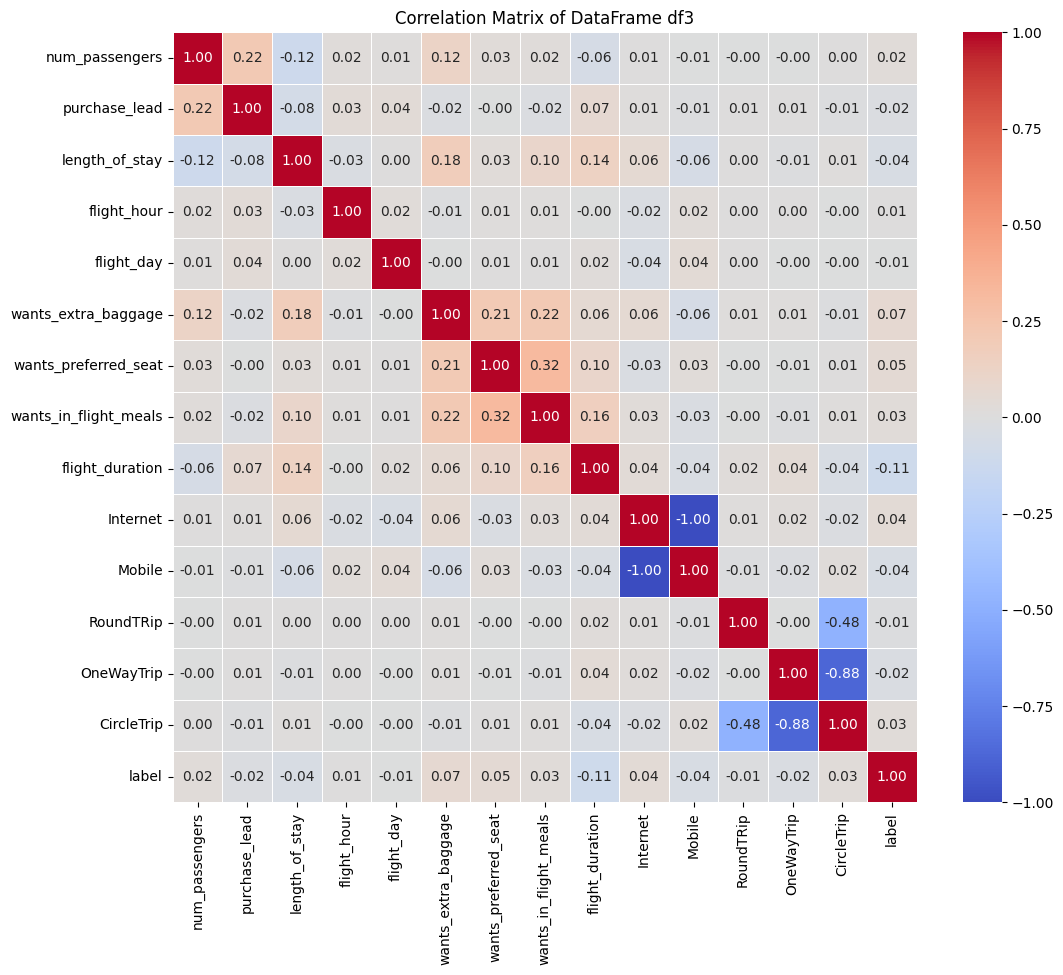

In [37]:
correlation_matrix = df3.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of DataFrame df3')
plt.show()

In [38]:
columns_to_exclude = ['Internet','Mobile',]
df4 = df3.drop(columns=columns_to_exclude)

### flight_duration

In [39]:
df4["flight_duration"].unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [40]:
df4["flight_duration"] = df4["flight_duration"].astype(str).str.split(".")

In [41]:
df4["flight_duration_hours"] = df4["flight_duration"].str[0].astype(int) 
df4["flight_duration_minutes"] = (df4["flight_duration"].str[1].astype(float) / 1.67).astype(int) 
print(df4[["flight_duration_hours", "flight_duration_minutes"]])

       flight_duration_hours  flight_duration_minutes
0                          5                       31
1                          5                       31
2                          5                       31
3                          5                       31
4                          5                       31
...                      ...                      ...
49258                      5                       37
49259                      5                       37
49260                      5                       37
49261                      5                       37
49262                      5                       37

[49263 rows x 2 columns]


In [42]:
columns_to_exclude = ['flight_duration']
df5 = df4.drop(columns=columns_to_exclude)

In [43]:
df5["flight_duration"] = [f"{hours}.{minutes}" for hours, minutes in zip(df5["flight_duration_hours"], df5["flight_duration_minutes"])]

In [44]:
df5 = df5[["num_passengers","purchase_lead", "length_of_stay","flight_hour", "flight_day","wants_extra_baggage",  
           "wants_preferred_seat","wants_in_flight_meals","flight_duration","RoundTRip" ,"OneWayTrip","CircleTrip" , "label"]]
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49263 entries, 0 to 49262
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   num_passengers         49263 non-null  int64 
 1   purchase_lead          49263 non-null  int64 
 2   length_of_stay         49263 non-null  int64 
 3   flight_hour            49263 non-null  int64 
 4   flight_day             49263 non-null  int64 
 5   wants_extra_baggage    49263 non-null  int64 
 6   wants_preferred_seat   49263 non-null  int64 
 7   wants_in_flight_meals  49263 non-null  int64 
 8   flight_duration        49263 non-null  object
 9   RoundTRip              49263 non-null  int32 
 10  OneWayTrip             49263 non-null  int32 
 11  CircleTrip             49263 non-null  int32 
 12  label                  49263 non-null  int64 
dtypes: int32(3), int64(9), object(1)
memory usage: 4.3+ MB


In [45]:
df_final = df5

### Route

In [46]:
df7=df1

In [47]:
df7['source'] = df7['route'].str.slice(0, 3)
df7['destination'] = df7['route'].str.slice(3)
df7.drop(columns=['route'], inplace=True)

C:\Users\shreyash\AppData\Local\Temp\ipykernel_2644\427280052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['source'] = df7['route'].str.slice(0, 3)
C:\Users\shreyash\AppData\Local\Temp\ipykernel_2644\427280052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['destination'] = df7['route'].str.slice(3)
C:\Users\shreyash\AppData\Local\Temp\ipykernel_2644\427280052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [48]:
df7.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,source,destination
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,AKL,DEL


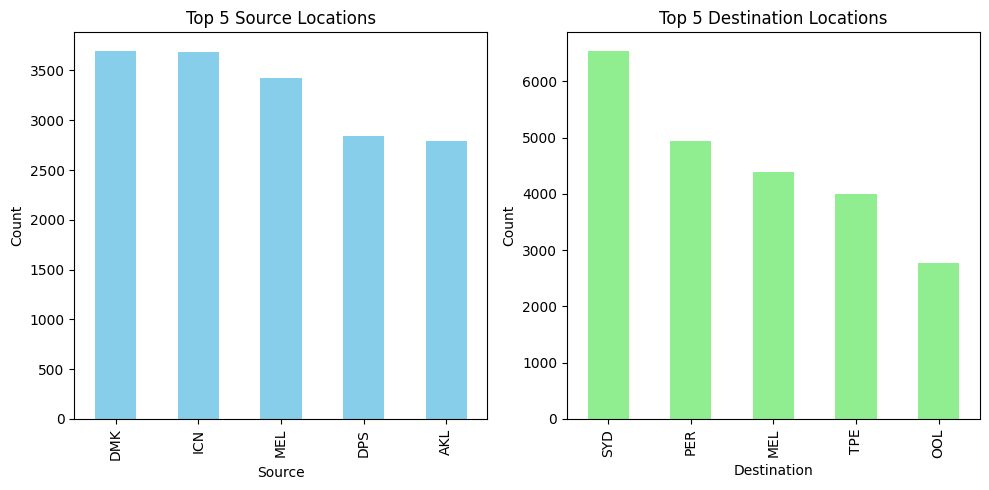

In [49]:
top_source = df7['source'].value_counts().head(5)
top_destination = df7['destination'].value_counts().head(5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
top_source.plot(kind='bar', color='skyblue')
plt.title('Top 5 Source Locations')
plt.xlabel('Source')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
top_destination.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Destination Locations')
plt.xlabel('Destination')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Correlation Matrix

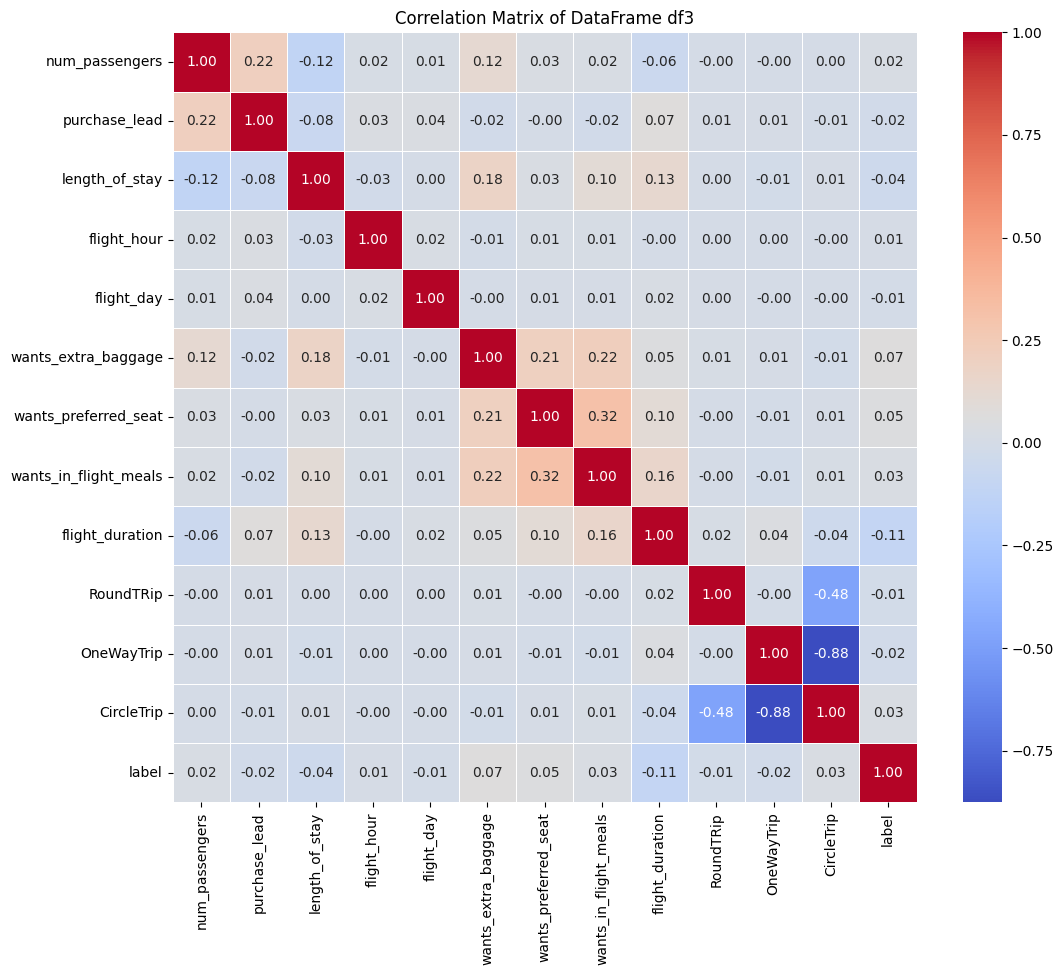

In [50]:
correlation_matrix = df_final.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of DataFrame df3')
plt.show()

## model traning 

### Splitting Train and Test Data

In [51]:
from sklearn.model_selection import train_test_split

X = df_final.iloc[:, :-1]
y = df_final['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
print("X_train count:", X_train.shape[0])
print("X_test count:", X_test.shape[0])
print("y_train count:", y_train.shape[0])
print("y_test count:", y_test.shape[0])

X_train count: 39410
X_test count: 9853
y_train count: 39410
y_test count: 9853


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

In [54]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

### Random Forest Classifier

In [55]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

#### Checking Training accuracy

In [56]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)
f1 = round(f1_score(y_train, y_pred_train),2) 
acc = round(accuracy_score(y_train, y_pred_train),2) 
pre = round(precision_score(y_train, y_pred_train),2) 
print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


In [57]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9344328850545547

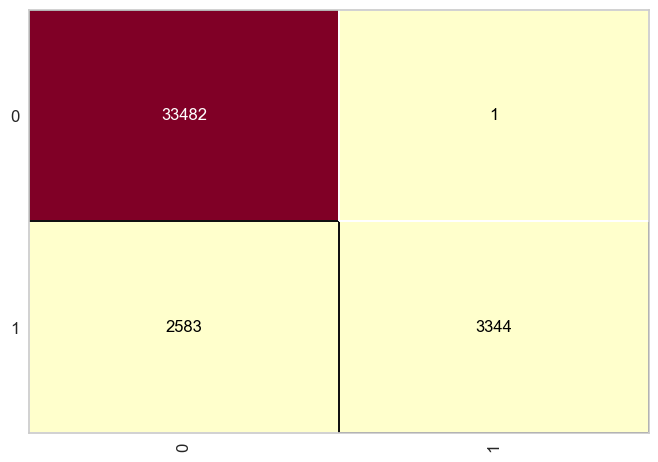

In [58]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_train, y_train)

#### Checking Testing accuracy

In [59]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

f1 = round(f1_score(y_test, y_pred_test),2) 
acc = round(accuracy_score(y_test, y_pred_test),2) 
pre = round(precision_score(y_test, y_pred_test),2) 
recall = round(recall_score(y_test, y_pred_test),2)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)
print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.85, 0.35, 0.02, 0.99 and 0.03 respectively


C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8492844818836902

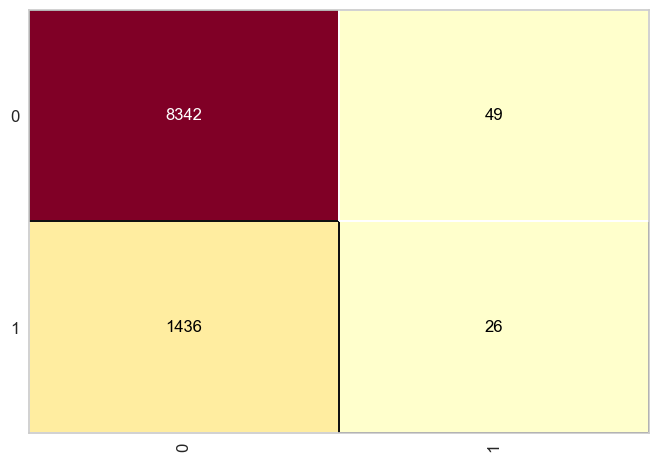

In [60]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

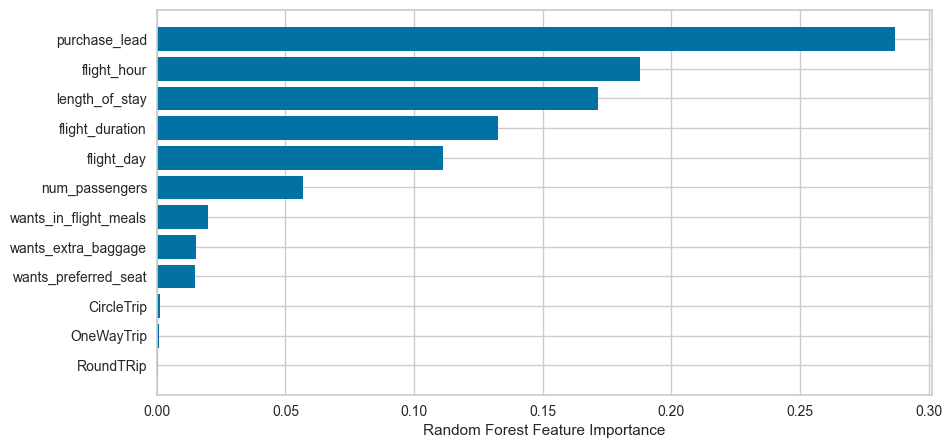

In [61]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(df_final.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

### Decision Tree Classifier

In [62]:
clf_dt = DecisionTreeClassifier(max_depth=50, min_samples_split=5, random_state=0)

#### Checking Training accuracy

In [63]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)
f1 = round(f1_score(y_train, y_pred_train), 2)
acc = round(accuracy_score(y_train, y_pred_train), 2)
pre = round(precision_score(y_train, y_pred_train), 2)

print(f"Accuracy, precision, and f1-score for training data are {acc}, {pre}, and {f1} respectively")

Accuracy, precision, and f1-score for training data are 0.93, 1.0, and 0.72 respectively


0.9543770616594773

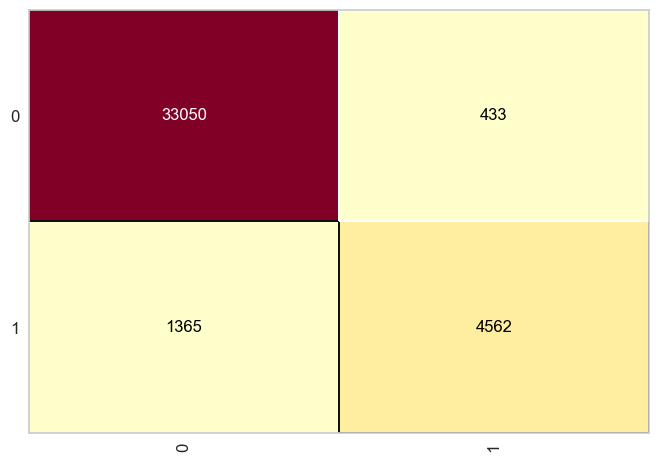

In [64]:
cm = ConfusionMatrix(clf_dt, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_train, y_train)

#### Checking Testing accuracy

In [65]:
y_pred_test = model_fit_predict(clf_dt, X_train, y_train, X_test)

f1 = round(f1_score(y_test, y_pred_test),2) 
acc = round(accuracy_score(y_test, y_pred_test),2) 
pre = round(precision_score(y_test, y_pred_test),2) 
recall = round(recall_score(y_test, y_pred_test),2)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)
print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.77, 0.2, 0.19, 0.87 and 0.19 respectively


C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7659596062113062

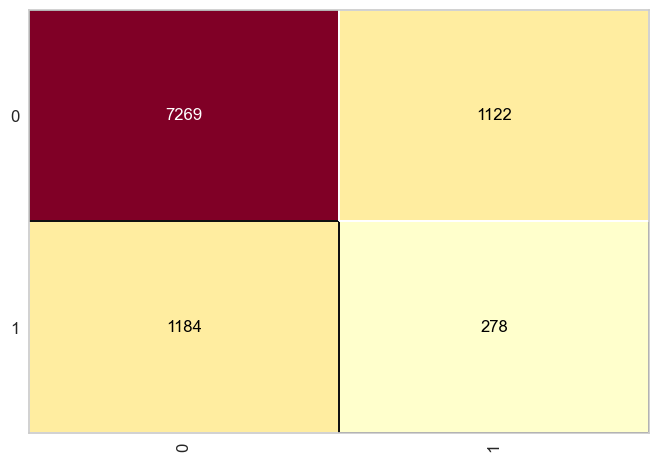

In [66]:
cm = ConfusionMatrix(clf_dt, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

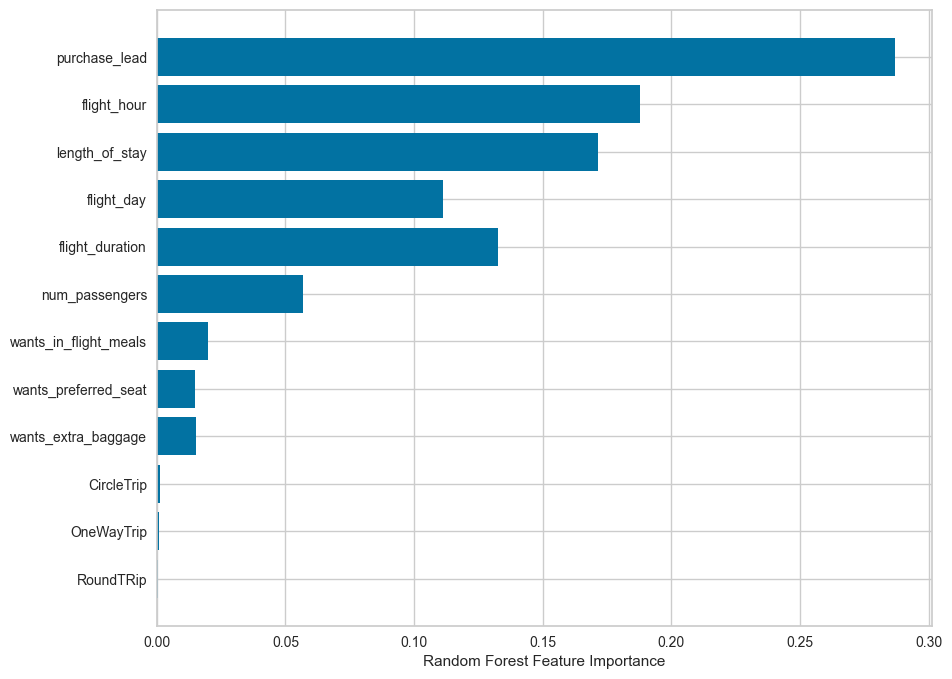

In [67]:
plt.figure(figsize=(10,8))
sorted_idx = clf_dt.feature_importances_.argsort()
plt.barh(df_final.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Creating Final Dataset

### equaling dataset

In [68]:
df_final["label"].value_counts()

label
0    41874
1     7389
Name: count, dtype: int64

In [69]:
scaled_df_0 = df_final[df_final["label"] ==0].sample(n=7389)

In [70]:
scaled_df_new = pd.concat([df_final[df_final['label'] == 1], scaled_df_0])
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)
scaled_df_new 

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTRip,OneWayTrip,CircleTrip,label
0,8,63,5,13,3,0,0,0,5.37,0,0,1,0
1,1,3,82,14,5,1,0,0,8.49,0,0,1,0
2,2,20,6,9,4,1,0,1,6.37,0,0,1,1
3,2,59,6,11,7,1,1,1,8.49,0,0,1,0
4,2,82,4,9,5,1,0,0,6.37,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,2,11,3,8,1,0,0,0,6.37,0,0,1,1
14774,1,8,22,5,7,1,0,0,7.25,0,0,1,1
14775,3,2,6,23,1,1,1,1,6.25,0,0,1,1
14776,2,3,6,10,2,1,1,1,8.40,0,0,1,1


In [71]:
duplicateds = scaled_df_new[scaled_df_new.duplicated()]
duplicateds

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTRip,OneWayTrip,CircleTrip,label
11285,2,125,5,17,1,1,0,1,6.37,0,0,1,1
14092,1,1,31,12,1,1,0,0,4.44,0,0,1,1


In [72]:
scaled_df_news =scaled_df_new.drop_duplicates()

In [73]:
scaled_df_news.shape

(14776, 13)

### model tarning and testing

In [74]:
X = scaled_df_news.iloc[:,:-1]
y = scaled_df_news['label']
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [75]:
clf_df1 = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

#### Checking Training accuracy

In [76]:
y_pred_train = model_fit_predict(clf_df1 , X_train, y_train, X_train)
set(y_pred_train)
f1 = round(f1_score(y_train, y_pred_train),2) 
acc = round(accuracy_score(y_train, y_pred_train),2) 
pre = round(precision_score(y_train, y_pred_train),2) 
print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.98, 0.97 and 0.98 respectively


0.9750423011844331

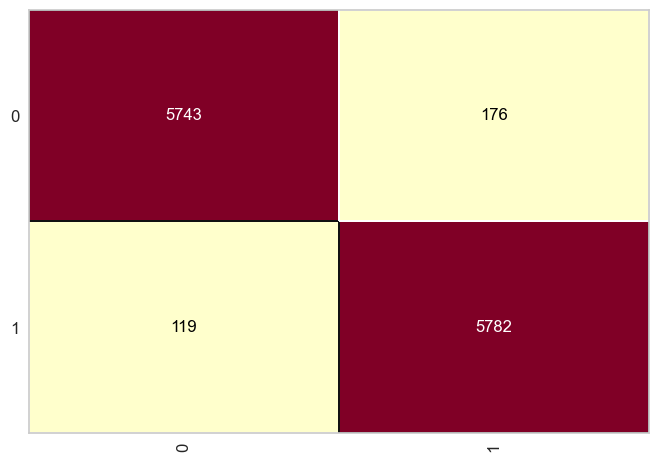

In [77]:
cm = ConfusionMatrix(clf_df1, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_train, y_train)

#### Checking Testing accuracy

In [78]:
y_pred_test = model_fit_predict(clf_df1, X_train, y_train, X_test)

f1 = round(f1_score(y_test, y_pred_test),2) 
acc = round(accuracy_score(y_test, y_pred_test),2) 
pre = round(precision_score(y_test, y_pred_test),2) 
recall = round(recall_score(y_test, y_pred_test),2)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)
print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.62, 0.62, 0.63, 0.62 and 0.63 respectively


0.6231393775372125

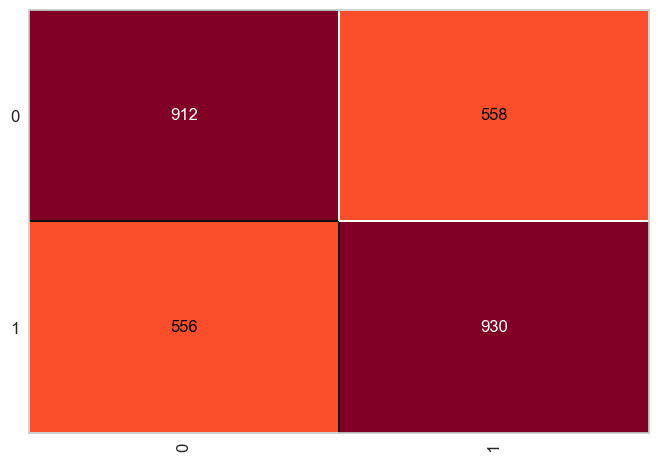

In [79]:
cm = ConfusionMatrix(clf_df1, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

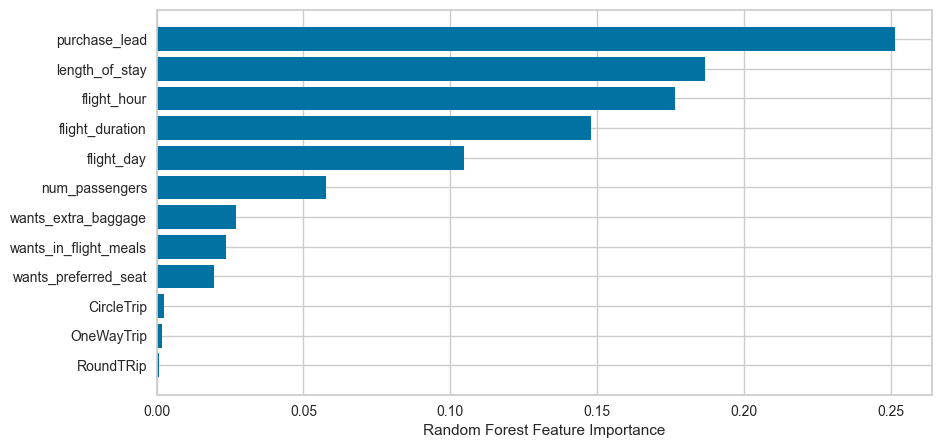

In [80]:
plt.figure(figsize=(10,5))
sorted_idx = clf_df1.feature_importances_.argsort()
plt.barh(df_final.iloc[:,:-1].columns[sorted_idx], clf_df1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## model checking

In [81]:
scaled_df_news.head(20)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTRip,OneWayTrip,CircleTrip,label
0,8,63,5,13,3,0,0,0,5.37,0,0,1,0
1,1,3,82,14,5,1,0,0,8.49,0,0,1,0
2,2,20,6,9,4,1,0,1,6.37,0,0,1,1
3,2,59,6,11,7,1,1,1,8.49,0,0,1,0
4,2,82,4,9,5,1,0,0,6.37,0,0,1,0
5,1,17,6,0,1,0,0,0,6.25,0,0,1,1
6,1,1,5,16,3,1,0,1,5.19,0,0,1,0
7,2,27,6,7,1,1,1,1,8.40,0,0,1,0
8,1,15,62,8,1,1,0,1,4.44,0,0,1,1
9,1,136,64,4,6,1,1,1,8.49,0,0,1,0


In [82]:
clf_df1 = RandomForestClassifier()

def model_fit_predict(clf, X_train, y_train, X_test):
    clf.fit(X_train, y_train)
    return clf.predict(X_test)


num_passengers = int(input("Enter the number of passengers: "))
purchase_lead = int(input("Enter the purchase lead: "))
length_of_stay = int(input("Enter the length of stay: "))
flight_hour = int(input("Enter the flight hour: "))
day_mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
flight_day_str = input("Enter the flight day (e.g., 'Mon', 'Tue', etc.): ")
flight_day = day_mapping.get(flight_day_str.capitalize())
if flight_day is None:
    raise ValueError("Invalid input for flight day")
wants_extra_baggage = int(input("Enter 1 if you want extra baggage, 0 otherwise: "))
wants_preferred_seat = int(input("Enter 1 if you want a preferred seat, 0 otherwise: "))
wants_in_flight_meals = int(input("Enter 1 if you want in-flight meals, 0 otherwise: "))
flight_duration = input("Enter the flight duration: ")
RoundTRip = int(input("Enter 1 if it's a round trip, 0 otherwise: "))
OneWayTrip = int(input("Enter 1 if it's a one-way trip, 0 otherwise: "))
CircleTrip = int(input("Enter 1 if it's a circle trip, 0 otherwise: "))

if wants_extra_baggage not in [0, 1]:
    raise ValueError("Invalid input for wants_extra_baggage")
if wants_preferred_seat not in [0, 1]:
    raise ValueError("Invalid input for wants_preferred_seat")
if wants_in_flight_meals not in [0, 1]:
    raise ValueError("Invalid input for wants_in_flight_meals")
if RoundTRip not in [0, 1]:
    raise ValueError("Invalid input for RoundTRip")
if OneWayTrip not in [0, 1]:
    raise ValueError("Invalid input for OneWayTrip")
if CircleTrip not in [0, 1]:
    raise ValueError("Invalid input for CircleTrip")

user_input = {
    'num_passengers': [num_passengers],
    'purchase_lead': [purchase_lead],
    'length_of_stay': [length_of_stay],
    'flight_hour': [flight_hour],
    'flight_day': [flight_day],
    'wants_extra_baggage': [wants_extra_baggage],
    'wants_preferred_seat': [wants_preferred_seat],
    'wants_in_flight_meals': [wants_in_flight_meals],
    'flight_duration': [flight_duration],
    'RoundTRip': [RoundTRip],
    'OneWayTrip': [OneWayTrip],
    'CircleTrip': [CircleTrip],
}

user_df = pd.DataFrame(user_input)
y_pred_user = model_fit_predict(clf_df1, X_train, y_train, user_df)
expected_label = 1
if y_pred_user[0] == expected_label:
    print("Booking complete")
else:
    print("Booking is not complete")


Enter the number of passengers:  2
Enter the purchase lead:  87
Enter the length of stay:  5
Enter the flight hour:  19
Enter the flight day (e.g., 'Mon', 'Tue', etc.):  wed
Enter 1 if you want extra baggage, 0 otherwise:  0
Enter 1 if you want a preferred seat, 0 otherwise:  0
Enter 1 if you want in-flight meals, 0 otherwise:  0
Enter the flight duration:  7
Enter 1 if it's a round trip, 0 otherwise:  0
Enter 1 if it's a one-way trip, 0 otherwise:  0
Enter 1 if it's a circle trip, 0 otherwise:  1


Booking complete


C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
